In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import synapseclient
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Li 2021 dataset
Source: https://www.cell.com/cancer-cell/fulltext/S1535-6108(22)00548-7

Stored at:https://data.mendeley.com/datasets/g67bkbnhhg/1

In [2]:
syn = synapseclient.Synapse()
syn.login()

Welcome, heimann!



## Loading data

In [3]:
#Load metadata
entity = syn.get('syn59809740')
adata = sc.read_h5ad(entity.path)

adata

AnnData object with n_obs × n_vars = 270855 × 19736
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'percent.mt', 'summaryDescription', 'annotation', 'region', 'broad_type', 'cell_type_iatlas'
    var: 'name'
    uns: 'annotation_colors', 'broad_type_colors', 'log1p', 'region_colors', 'summaryDescription_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'normalized'

In [36]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,patient,percent.mt,summaryDescription,annotation,region,broad_type
5739STDY7958790_AACTCAGTCCTCAACC-1,5739STDY7958790,4916.0,301,PD43948,3.641172,Blood,Plasma-IgG,b,Plasma
5739STDY7958790_AAGTCTGTCGGATGGA-1,5739STDY7958790,2708.0,903,PD43948,7.053176,Blood,Switched-memory_B,b,B-cell
5739STDY7958790_ACACCCTGTGTGAAAT-1,5739STDY7958790,4575.0,672,PD43948,2.710383,Blood,Plasma-IgA,b,Plasma
5739STDY7958790_ACATGGTTCAGTTTGG-1,5739STDY7958790,2931.0,1361,PD43948,8.597748,Blood,Naïve_B.2,b,B-cell
5739STDY7958790_ACCGTAAGTCTTCTCG-1,5739STDY7958790,5965.0,266,PD43948,0.670578,Blood,Plasma-IgA,b,Plasma
...,...,...,...,...,...,...,...,...,...
5739STDY9266997_TGCTACCAGTGGAGAA-1,5739STDY9266997,4556.0,1956,PD47512,7.791923,Tumour-normal,PT,g,RCC
5739STDY9266997_TTCTCCTTCCTTAATC-1,5739STDY9266997,4771.0,2127,PD47512,0.020960,Tumour-normal,CD,g,RCC
5739STDY9266997_TTGAACGGTGCGATAG-1,5739STDY9266997,5502.0,2499,PD47512,14.921847,Tumour-normal,PT,g,Epi_non-PT
5739STDY9266997_TTGACTTCACCCAGTG-1,5739STDY9266997,5027.0,2384,PD47512,0.000000,Tumour-normal,PT,g,RCC


### Clinical Data

In [30]:
# Some annotation in obs seem to be clinical annotation
pd.DataFrame({
        'summaryDescription': adata.obs["summaryDescription"],
        'annotation': adata.obs["annotation"],
        'region': adata.obs["region"],
        'broad_type': adata.obs["broad_type"]
    }
)

,summaryDescription,annotation,region,broad_type
5739STDY7958790_AACTCAGTCCTCAACC-1,Blood,Plasma-IgG,b,Plasma
5739STDY7958790_AAGTCTGTCGGATGGA-1,Blood,Switched-memory_B,b,B-cell
5739STDY7958790_ACACCCTGTGTGAAAT-1,Blood,Plasma-IgA,b,Plasma
5739STDY7958790_ACATGGTTCAGTTTGG-1,Blood,Naïve_B.2,b,B-cell
5739STDY7958790_ACCGTAAGTCTTCTCG-1,Blood,Plasma-IgA,b,Plasma
...,...,...,...,...
5739STDY9266997_TGCTACCAGTGGAGAA-1,Tumour-normal,PT,g,RCC
5739STDY9266997_TTCTCCTTCCTTAATC-1,Tumour-normal,CD,g,RCC
5739STDY9266997_TTGAACGGTGCGATAG-1,Tumour-normal,PT,g,Epi_non-PT
5739STDY9266997_TTGACTTCACCCAGTG-1,Tumour-normal,PT,g,RCC


In [5]:
#Inspect more closely unique values for cell type
adata.obs["broad_type"].value_counts()

broad_type
T-cell        147172
Myeloid        49329
NK             35541
RCC            14399
B-cell          7841
EC              6048
Fibro           3671
Epi_non-PT      2378
Epi_PT          1950
Plasma          1254
pDC              756
Mast             516
Name: count, dtype: int64

### UMAP coordinates

They are stored in the obsm

In [33]:
adata.obsm["X_umap"]

array([[  5.38015206, -13.5507429 ],
       [ -1.94174736, -16.21859816],
       [  5.3815263 , -13.64365176],
       ...,
       [ -3.78523224,  13.8357813 ],
       [ -6.15629833,   9.57048151],
       [ -6.05267303,  11.15418169]])

In [46]:
#Export them as csv file
umap_df = pd.DataFrame(adata.obsm["X_umap"])
umap_df.index = adata.obs.index
umap_df.columns = ["umap_1", "umap_2"]
umap_df

,umap_1,umap_2
5739STDY7958790_AACTCAGTCCTCAACC-1,5.380152,-13.550743
5739STDY7958790_AAGTCTGTCGGATGGA-1,-1.941747,-16.218598
5739STDY7958790_ACACCCTGTGTGAAAT-1,5.381526,-13.643652
5739STDY7958790_ACATGGTTCAGTTTGG-1,-2.599507,-16.272254
5739STDY7958790_ACCGTAAGTCTTCTCG-1,5.419443,-13.690668
...,...,...
5739STDY9266997_TGCTACCAGTGGAGAA-1,-9.259754,11.064877
5739STDY9266997_TTCTCCTTCCTTAATC-1,-6.778350,8.820329
5739STDY9266997_TTGAACGGTGCGATAG-1,-3.785232,13.835781
5739STDY9266997_TTGACTTCACCCAGTG-1,-6.156298,9.570482


In [48]:
umap_df.to_csv('Li_2022_umap.tsv', sep='\t', index=True)
file_entity = synapseclient.File('Li_2022_umap.tsv', 'syn59809727')
file_entity = syn.store(file_entity)

Uploading to Synapse storage: 100%|█| 19.7M/19.7M [00:05<00:00, 3.86MB/s, Li_202


### Counts

In [34]:
#let's take a look at the raw counts
adata.layers['counts'] = adata.X
adata.to_df(layer = "counts")

,FO538757.3,FO538757.2,AP006222.2,RP5-857K21.4,RP11-206L10.9,LINC00115,FAM41C,NOC2L,KLHL17,PLEKHN1,...,AC007192.6,CTD-2545M3.8,CTD-3022G6.1,AC006547.13,RP11-247I13.11,BACH1-IT2,AP000282.2,LINC01436,CRYAA,RP1-101D8.1
5739STDY7958790_AACTCAGTCCTCAACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739STDY7958790_AAGTCTGTCGGATGGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739STDY7958790_ACACCCTGTGTGAAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739STDY7958790_ACATGGTTCAGTTTGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739STDY7958790_ACCGTAAGTCTTCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739STDY9266997_TGCTACCAGTGGAGAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739STDY9266997_TTCTCCTTCCTTAATC-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739STDY9266997_TTGAACGGTGCGATAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739STDY9266997_TTGACTTCACCCAGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# QC

This file already has QC metrics in the obs, so we just need to plot them to get a sense if any additional filtering is needed.

According to the study manuscript, the following steps were performed:

*Cells with greater than 30% mitochondrial content, or expression of fewer than 200 genes were excluded from further analysis. We used relatively permission thresholds to avoid removing renal epithelial cells that are known to have relatively high mitochondrial contents. We used standard clustering metrics and the expression of canonical marker genes to broadly classify cells into the principal cell subsets; T and NK cells, B and plasma cells, myeloid cells, endothelial cells, epithelial cells (non-cancerous), fibroblasts, and cancerous RCC cells. Cell clusters expressing implausible combinations of cell lineage specific marker genes were labeled doublets and were excluded from further analysis.*

Text(0, 0.5, 'N cells')

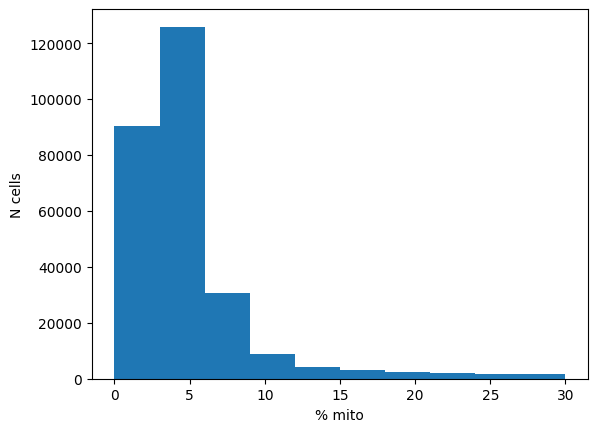

In [35]:
plt.hist(adata.obs['percent.mt'])
plt.xlabel('% mito')
plt.ylabel('N cells')

We can see from this data that the authors already filtered cells with mito_frac > 30% (as mentioned in the manuscript)

In [38]:
# Now, checking the number of genes per count
pd.DataFrame.describe(adata.obs['nFeature_RNA'])

count    270855.000000
mean       1232.847217
std         480.380431
min         201.000000
25%         894.000000
50%        1182.000000
75%        1506.000000
max        3886.000000
Name: nFeature_RNA, dtype: float64

From this plot, we can see that the filter of >200 genes per count mentioned in the manuscript was applied.

There is no annotation showing the last filtering step (*Cell clusters expressing implausible combinations of cell lineage specific marker genes were labeled doublets and were excluded from further analysis.*), so we will assume that, as the previous filters, this file already went through this step.

#### So, it appears that we already have a file with data that went through pre-processing. No further filtering will be made to the original file.

# Formatting to run pseudobulk

In [13]:
# save raw counts as a layer
adata.layers['counts'] = adata.X

In [39]:
# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers['normalized'] = adata.X


In [6]:
#This dataset has different names for cells than what we will use in iAtlas, so let's update them
def func(a):
    if "T-cell" in a:
        return "T cell"
    elif "Myeloid" in a:
        return "myeloid cell"
    elif "B-cell" in a:
        return "B cell"
    elif "Mast" in a:
        return "mast cell"
    elif "EC" in a:
        return "endothelium"
    elif "Epi_non-PT" in a:
        return "epithelium"
    elif "Epi_PT" in a:
        return "proximal tubule"
    elif "Fibro" in a:
        return "fibroblast"
    elif "RCC" in a:
        return "tumor"
    elif "Plasma" in a:
        return "plasma cell"
    elif "pDC" in a:
        return "Dendritic cell"
    else:
        return a

adata.obs["cell_type_iatlas"] = adata.obs["broad_type"].apply(lambda x: func(x))

In [7]:
adata

AnnData object with n_obs × n_vars = 270855 × 19736
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient', 'percent.mt', 'summaryDescription', 'annotation', 'region', 'broad_type', 'cell_type_iatlas'
    var: 'name'
    uns: 'annotation_colors', 'broad_type_colors', 'log1p', 'region_colors', 'summaryDescription_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'normalized'

In [8]:
adata.obs["cell_type_iatlas"].value_counts()

cell_type_iatlas
T cell             147172
myeloid cell        49329
NK                  35541
tumor               14399
B cell               7841
endothelium          6048
fibroblast           3671
epithelium           2378
proximal tubule      1950
plasma cell          1254
Dendritic cell        756
mast cell             516
Name: count, dtype: int64

# File uploads

In [10]:
adata.write('li_iatlas.h5ad')
file_entity = synapseclient.File('li_iatlas.h5ad', 'syn59809728')
file_entity = syn.store(file_entity)

Uploading to Synapse storage:  38%|▍| 3.06G/8.16G [01:09<01:56, 43.9MB/s, li_iat
Uploading to Synapse storage:   0%| | 0.00/8.16G [00:00<?, ?B/s, li_iatlas.h5ad]
Uploading to Synapse storage:  38%|▍| 3.08G/8.16G [01:20<02:12, 38.4MB/s, li_iat
Uploading to Synapse storage:  49%|▍| 4.03G/8.16G [00:18<00:18, 219MB/s, li_iatl
Uploading to Synapse storage:  49%|▍| 4.03G/8.16G [00:18<00:18, 219MB/s, li_iatl
Uploading to Synapse storage:  50%|▍| 4.04G/8.16G [00:18<00:18, 218MB/s, li_iatl
Uploading to Synapse storage:  50%|▍| 4.07G/8.16G [00:18<00:18, 218MB/s, li_iatl
Uploading to Synapse storage:  50%|▌| 4.09G/8.16G [00:19<00:19, 212MB/s, li_iatl
Uploading to Synapse storage:  50%|▌| 4.12G/8.16G [00:19<00:19, 210MB/s, li_iatl
Uploading to Synapse storage:  51%|▌| 4.14G/8.16G [00:19<00:19, 208MB/s, li_iatl
Uploading to Synapse storage:  51%|▌| 4.17G/8.16G [00:20<00:19, 208MB/s, li_iatl
Uploading to Synapse storage:  51%|▌| 4.19G/8.16G [00:20<00:19, 200MB/s, li_iatl
Uploading to Synapse storage